In [ ]:
pip install mlflow

Note: you may need to restart the kernel to use updated packages.


In [31]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [32]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error, mean_squared_error
import joblib
from datetime import datetime
import mlflow
import mlflow.sklearn
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller

In [ ]:
#Function to  load data using error handling method

def load_data(file_path):
    try:
        data = pd.read_csv(file_path)
        print("Data loaded successfully.")
        return data
    except Exception as e:
        print(f"Error loading data: {e}")
        return None

In [ ]:
#reading cleaned csv data
data = pd.read_csv("C:/Users/vipin/OneDrive/Documents/Desktop/Project6/clean_df.csv")
data

C:\Users\vipin\AppData\Local\Temp\ipykernel_21924\2869379297.py:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("C:/Users/vipin/OneDrive/Documents/Desktop/Project6/clean_df.csv")


,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,...,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,SalesperCustomer
0,1,5,5263.0,555.0,1,1,0,1,2015,7,...,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,9.482883
1,2,5,6064.0,625.0,1,1,0,1,2015,7,...,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",9.702400
2,3,5,8314.0,821.0,1,1,0,1,2015,7,...,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",10.126675
3,4,5,13995.0,609.0,1,1,0,1,2015,7,...,c,c,620.0,9.0,2009.0,0,0.0,0.0,0,22.980296
4,5,5,4822.0,559.0,1,1,0,1,2015,7,...,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0,8.626118
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,0.0,0.0,0,0,a,1,2013,1,...,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct",NaN
1017205,1112,2,0.0,0.0,0,0,a,1,2013,1,...,c,c,1880.0,4.0,2006.0,0,0.0,0.0,0,NaN
1017206,1113,2,0.0,0.0,0,0,a,1,2013,1,...,a,c,9260.0,0.0,0.0,0,0.0,0.0,0,NaN
1017207,1114,2,0.0,0.0,0,0,a,1,2013,1,...,a,c,870.0,0.0,0.0,0,0.0,0.0,0,NaN


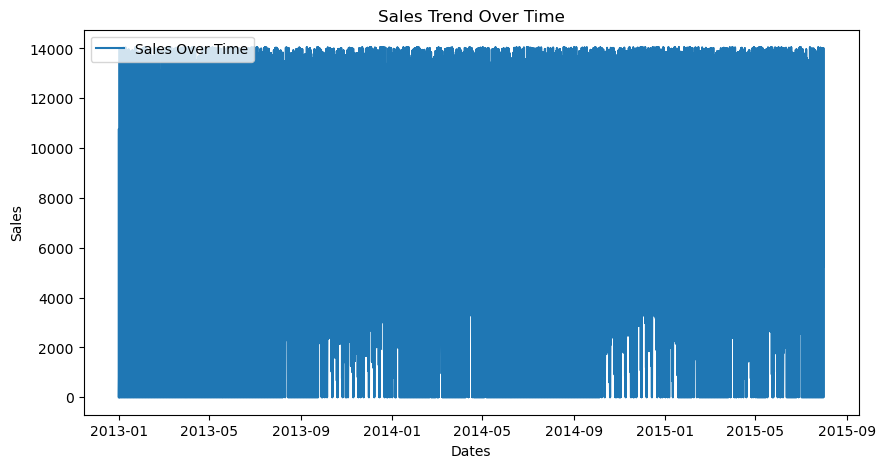

In [ ]:
#plotting sales tred over time

plt.figure(figsize=(10, 5))
plt.plot(data['Dates'], data['Sales'], label='Sales Over Time')
plt.title('Sales Trend Over Time')
plt.xlabel('Dates')
plt.ylabel('Sales')
plt.legend()
plt.show()

In [ ]:
#checking column name

data.columns

Index(['Store', 'DayOfWeek', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'Year', 'Month', 'Day', 'Dates',
       'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval',
       'SalesperCustomer'],
      dtype='object')

In [ ]:
def preprocess_data(data):
    # Convert Dates to datetime format
    data['Dates'] = pd.to_datetime(data['Dates'])
    
    # Create new time
    data['DayOfWeek'] = data['Dates'].dt.dayofweek
    data['IsWeekend'] = data['DayOfWeek'].apply(lambda x: 1 if x >= 5 else 0)
    data['DayOfMonth'] = data['Dates'].dt.day
    data['Month'] = data['Dates'].dt.month
    data['Year'] = data['Dates'].dt.year
    data['IsMonthStart'] = data['Dates'].dt.is_month_start.astype(int)
    data['IsMonthEnd'] = data['Dates'].dt.is_month_end.astype(int)
    data.fillna(method='ffill', inplace=True)
    return data

In [37]:
data = preprocess_data(data)

C:\Users\vipin\AppData\Local\Temp\ipykernel_21924\1464753245.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


In [ ]:
#dropping column
features = data.drop(columns=['Sales', 'Dates'])
target = data['Sales']

In [ ]:
# Splitting data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [40]:
 #Identify categorical columns

categorical_columns = X_train.select_dtypes(include=['object']).columns
numeric_columns = X_train.select_dtypes(exclude=['object']).columns

In [41]:
for col in categorical_columns:
    X_train[col] = X_train[col].astype(str)
    X_test[col] = X_test[col].astype(str)

In [ ]:
#using pipeline with Column Transformer

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_columns),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_columns)
    ]
)

In [ ]:
#Building Model with pipelines

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('imputer', SimpleImputer(strategy='median')),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

In [ ]:
# Fitting the pipeline using try and except method
try:
    pipeline.fit(X_train, y_train)
except Exception as e:
    print(f"Error fitting the pipeline: {e}")
    raise

In [45]:
y_pred = pipeline.predict(X_test)

In [46]:
# Calculating MAE and MSE
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

In [47]:
print(f"Mean Absolute Error (MAE): {mae}")

Mean Absolute Error (MAE): 2.873787615143385


In [48]:
print(f"Mean Squared Error (MSE): {mse}")

Mean Squared Error (MSE): 178.83154377070608


In [ ]:
# Feature Importance

feature_importances = pipeline.named_steps['regressor'].feature_importances_
ohe_feature_names = pipeline.named_steps['preprocessor'].transformers_[1][1].get_feature_names_out(categorical_columns)

all_feature_names = np.concatenate([numeric_columns, ohe_feature_names])

important_features = pd.DataFrame({'Feature': all_feature_names, 'Importance': feature_importances})

important_features = important_features.sort_values(by='Importance', ascending=False)

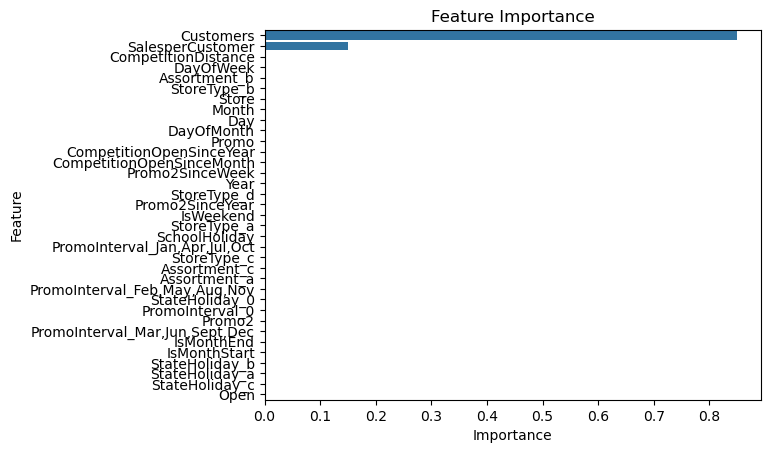

In [51]:
# Plot feature importance
sns.barplot(data=important_features, x='Importance', y='Feature')
plt.title("Feature Importance")
plt.show()

In [ ]:
# Saving model with timestamp
model_filename = f"model_{datetime.now().strftime('%d-%m-%Y-%H-%M-%S-%f')}.pkl"
joblib.dump(pipeline, model_filename)

['model_03-11-2024-01-52-11-258835.pkl']

In [ ]:
# Transforming time series data for LSTM
data_lstm = data[['Dates', 'Sales']].copy()
data_lstm.set_index('Dates', inplace=True)

In [ ]:
# checking nan value
data_lstm['Sales'].dropna(inplace=True)

subset_data = data_lstm['Sales'].iloc[:10000]

# ADF Test
result = adfuller(subset_data)
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

ADF Statistic: -2.7720212914741325
p-value: 0.06238280336584165


In [60]:
data_lstm['Sales_diff'] = data_lstm['Sales'] - data_lstm['Sales'].shift(1)
data_lstm.dropna(inplace=True)

In [61]:
#Scaling
scaler = MinMaxScaler(feature_range=(-1, 1))
data_lstm['Sales_scaled'] = scaler.fit_transform(data_lstm[['Sales_diff']])

In [ ]:
#sliding window

def create_lagged_features(data, lag=1):
    X, y = [], []
    for i in range(len(data) - lag):
        X.append(data[i:i + lag])
        y.append(data[i + lag])
    return np.array(X), np.array(y)

In [ ]:
data_lstm['Sales_scaled'] = data_lstm['Sales_scaled'].astype('float32')

small_data = data_lstm['Sales_scaled'].iloc[:100000].values

# Creatng lagged features
lag = 30  # 30 days window
X_lstm, y_lstm = create_lagged_features(small_data, lag)

# Reshape X_lstm for LSTM input
X_lstm = X_lstm.reshape((X_lstm.shape[0], X_lstm.shape[1], 1))

In [65]:
#Train-Test Split

train_size = int(0.8 * len(X_lstm))
X_train_lstm, X_test_lstm = X_lstm[:train_size], X_lstm[train_size:]
y_train_lstm, y_test_lstm = y_lstm[:train_size], y_lstm[train_size:]

In [ ]:
#Building LSTM model

model = Sequential([
    LSTM(50, activation='relu', return_sequences=True, input_shape=(lag, 1)),  # Set return_sequences=True
    Dropout(0.2),
    LSTM(50, activation='relu'),  # The output will now be 2D
    Dropout(0.2),  # Optionally add another Dropout layer for regularization
    Dense(1)  # Final output layer
])




In [69]:
# Compile the model
model.compile(optimizer='adam', loss='mse')

In [70]:
# Train LSTM model
history = model.fit(X_train_lstm, y_train_lstm, epochs=10, batch_size=32, validation_data=(X_test_lstm, y_test_lstm))


Epoch 1/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 46s 16ms/step - loss: 0.0335 - val_loss: 0.0237
Epoch 2/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 47s 19ms/step - loss: 0.0254 - val_loss: 0.0226
Epoch 3/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 47s 19ms/step - loss: 0.0246 - val_loss: 0.0233
Epoch 4/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 48s 19ms/step - loss: 0.0241 - val_loss: 0.0217
Epoch 5/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 48s 19ms/step - loss: 0.0238 - val_loss: 0.0216
Epoch 6/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 48s 19ms/step - loss: 0.0237 - val_loss: 0.0214
Epoch 7/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 48s 19ms/step - loss: 0.0235 - val_loss: 0.0214
Epoch 8/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 48s 19ms/step - loss: 0.0233 - val_loss: 0.0217
Epoch 9/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 50s 20ms/step - loss: 0.0233 - val_loss: 0.0213
Epoch 10/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 49s 20ms/step - loss: 0.0235 - val_loss: 0.0212


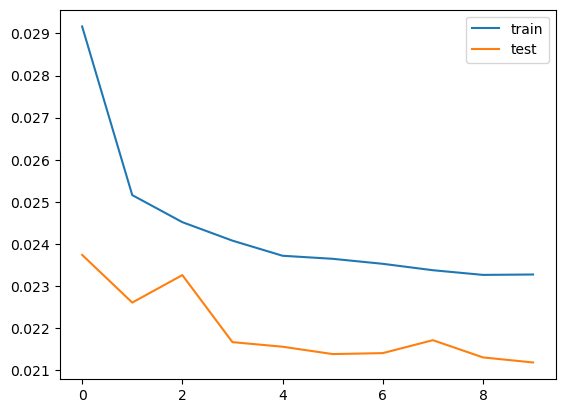

In [81]:
# Plot the training and validation loss
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [ ]:
#Using MLFlow to Serve the Prediction

with mlflow.start_run():
    
    mlflow.sklearn.log_model(pipeline, "rf_sales_prediction_model")
    mlflow.log_metric("mae", mae)
    mlflow.log_metric("mse", mse)

2024/11/03 02:06:40 WARNING mlflow.utils.environment: Encountered an unexpected error while inferring pip requirements (model URI: C:\Users\vipin\AppData\Local\Temp\tmpcvp_60sv\model\model.pkl, flavor: sklearn). Fall back to return ['scikit-learn==1.4.2', 'cloudpickle==2.2.1']. Set logging level to DEBUG to see the full traceback. 
2024/11/03 02:06:40 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


In [76]:
# Log hyperparameters
mlflow.log_param("rf_n_estimators", 100)


100

In [77]:
mlflow.log_param("rf_random_state", 42)

42

In [ ]:
#saving the model

model.save("lstm_sales_model.h5")
mlflow.log_artifact("lstm_sales_model.h5")

In [ ]:
# Log LSTM parameters
mlflow.log_param("LSTM_layers", 2)
mlflow.log_param("LSTM_units", 50)
mlflow.log_param("batch_size", 32)
mlflow.log_param("epochs", 10)

10

In [80]:
print("Model training and logging completed successfully.")

Model training and logging completed successfully.
